# Trabajo práctico 2: Series temporales
## Aclaraciones:
Para poder correr dicho notebook, necesitan estar todos los archivos *.mat en el mismo directorio del notebook.

## Alumnos:
De Sousa Bispo Germán Edgardo 359/12
<br> Podavini Rey Martín Gastón 483/12 </br>
<br> Wright Carolina Rocío 876/12 </br>

## Introduccion

Serie temporal<br>
Una serie temporal es una serie de puntos indexados ordenados en el tiempo. Se considera que entre una muestra y la otra siempre hay el mismo espacio.


Random variation<br>
Toda colección de datos tomada en el tiempo tiene ruido
Es un error de medición aleatorio, puede ser que el sensor dependiendo de la temperatura cambie su comportamiento, etc. Cuando nos llegan estos datos, llegan sucios.

Hay técnicas para suavizar estas curvas que tienen ruido. Compensar el ruido que tuve en un momento dado con el ruido que tuve en un momento dado con el ruido que tuve un poquito antes suponiendo que como es aleatorio se compensa uno con el otro.

Métodos de reducción de ruido: “smoothing” (alisamiento)<br>
● Alisamiento por medias <br>
● Alisamiento exponencial

El tema que si hacemos por media, puede ser que nuestra curva tenga una pendiente. Entonces calcular la media sobre todos los datos no sirve, hagamosla solo en un entornito chiquito, agarremos 3 anteriores y calculamos la media. Entonces de esta manera puedo alisar tendencias. Esto es el famoso moving average. Cuantos puntos agarro? Existen tantos moving average como decisiones tomemos. Cada uno tiene su teoría de cual es el mejor y algunos son muy muy estándar. 

Lo que se suele usar es que el peso de los puntos anteriores que uno toma decrece exponencialmente. (Exponentially Weighted Moving Average)

Ahora bien, cómo hacemos para comparar si nuestra estimación es buena? Lo que podemos hacer es calcular el error, es decir, la resta entre la estimación y el valor real. En la práctica lo que se hace es el error al cuadrado.
Ahora bien, podemos hacer la suma de todos estos errores al cuadrado y tener en un numerito, que tan bueno es nuestro modelo. Es cierto esto? Realmente no, veamos el principal inconveniente de usar esta métrica.

Notemos que los errores al cuadrado siempre son positivos, entonces la suma es estrictamente positiva de los errores al cuadrado. Si nosotros tenemos una serie aproximada por un modelo lineal con 20 puntos y otra con 40 puntos, que me indica el SSE (suma de errores al cuadrado) en cada una? Notar que a mas puntos, voy a estar sumando más términos en mi SSE.

Tenemos que pensar otra cosa. Podemos calcular por ejemplo la media. Cual es el promedio de los errores cuadráticos (MSE).

Vamos primero con una definición. Serie estacionaria:

Se dice que una serie de tiempo es estacionaria cuando su distribución y sus parámetros no varían con el tiempo.

En términos más concretos, la media y la varianza de una serie estacionaria no cambian con el tiempo, y tampoco siguen una tendencia.

Si lo ilustramos con las siguientes imágenes, lo podrás ver de una forma mucho más clara:

Algo que me gustaría decidir es si una serie es estacionaria o no. Un test de hipótesis para evaluar esto puede ser Test de Dickley-Fuller. Supone que hay una tendencia (es decir, que no es estacionaria), y quiere rechazar esto. Es muy poco probable que esa serie venga de una distribución de probabilidad que tenga tendencia (si el p-valor es muy chico).

Goodness of fit: cuan bueno es el fiteo de mi modelo. Un primer approach es medir el promedio de los errores cuadráticos.

Es bueno elegir el modelo que menor MSE me de en los datos nuevos? A primera vista si. Pero qué pasa si le ponemos muchos parámetros? Es decir, que nuestra regresión lineal tenga varios beta a estimar? Por ejemplo, usar un polinomio de grado alto. Vamos a tener error 0 basicamente, y quizá (seguramente) esto no generaliza nada! Por eso es de suma importancia separar un set para entrenar nuestro regresor, y otra para testear. Mas sobre esto en el tp de machine learning.

Notar que tenemos un intervalo de confianza entorno a los Beta que nos dice en qué entorno tenemos 95% de probabilidad de encontrar a esos Beta. Esto es debido a que tenemos un error en nuestras mediciones, y los Beta que calculemos para una muestra, luego en otra muestra pueden ser distintos! Si nuestro intervalo es pequeño, entonces van a ser parecidos. Sería muy distinto el Beta si replico muchas veces este experimento con distintas mediciones? Esto nos dice el intervalo de confianza. Notar que definimos que el error de medicion es normal para poder calcular los intervalos de confianza.

Tendencias lineales:

Regresión Lineal Simple
Consiste en predecir una respuesta cuantitativa Y en base a una única variable predictora X.

<img src="images/1.png">

Vamos a estimar B_0 y B_1. Una vez hecho esto nos queda la siguiente formula:

<img src="images/2.png">

Para encontrar dichas estimaciones vamos a definir lo que es el residuo o error de prediccion:

<img src="images/3.png">
<img src="images/4.png">

Ahora definimos el RSS (Residual sum of squares):

<img src="images/5.png">

Los residuos se elevan al cuadrado para sacar el signo y para que RSS sea diferenciable
Para estimar los coeficientes, buscamos minimizar RSS. Para esto derivamos RSS respecto de B_0 y B_1. Notar que no es robusto ante outliers, ya que RSS penaliza los residuos grandes.

<img src="images/6.png">

El intercept es el B_0 y el B_1 es la pendiente o el coeficiente asociado a la variable superficie. Estamos tratando de evaluar la bondad de dos coeficientes. Para eso se usa el Standard Error que me da un valor, ese valor en terminos absolutos no me va a decir demasiado, hay que mirarlos con algo mas. Me da el intervalo de confianza (Es util para estimar intervalos de confianza de las predicciones). El standard error es el punto de partida que me lleva a la columna del p-value. Que es esto? Hacemos experimentos y necesitamos una nocion de cuan bueno es el resultado obtenido. Calculamos primero un T-Test (test de student), es un test estadistico que me permite saber cual es la probabilidad que esa estimacion sea distinta de un numero. El p-valor es el resultado del T-Test. Si es bajo (por ejemplo menor a 0.01) tenemos buenas chances de que el B_i correspondiente sea significativo. Es improbable que el valor que nos da de B_i sea consecuencia del azar. Es decir, observamos los datos, ajustamos un modelo, tenemos los predictores para B_i, calculo el standard error, calculo el T-Test y veo que me da como p-valor. Si el p-valor de B_1 me da bajo quiere decir que tengo buenas chances de que no sea consecuencia del azar, es decir que tuve suerte y que los datos me vinieron de tal manera que si agarro un nuevo set de datos me da otra cosa totalmente diferente. Si yo replico esto con una nueva muestra dentro de la misma poblacion es muy probable que caiga en un valor parecido. El p-valor esta asociado a una nocion de cuan significativos son los resultados y esa nocion es variable cuando definimos que seria un p-valor bajo. Si te da un p-valor alto quiere decir que no le des bola al B_i. Por como son los datos, tenes evidencia que si corres de nuevo el experimento, te va a dar otra cosa. Es demasiado amplio el intervalo de confianza que surge. El T-test es parametrico, tomamos como condicion que el termino del error es una normal (0, algo) con lo que los residuos estan distribuidos normalmente.

Ahora pasamos a que me diga el accuracy, o el F-measure. Para eso se usa la metrica R^2 (r cuadrado). Por un lado tenemos la RSS que es la sumatoria de los residuos al cuadrado. Esto me da una nocion de cuanto le pifio el modelo, es lo que queremos minimizar para que el modelo sea lo mas justo, exacto posible. Es una metrica que no es muy util. Es un valor absoluto que depende de los datos que observamos. Queremos algo mas manejable, algo entre 0 y 1 seria buenisimo. Si te da 1 es 100% por ejemplo. Eso es el R cuadrado. Es la variabilidad no explicada por el modelo. Todo lo que se le escapa al modelo. Si vale 0 es cuando el modelo explica poco de la variabilidad de los datos. Si vale 1 es cuando el modelo explica mucho de la variabilidad de los datos. Ahora definimos el TSS que es muy parecido. Es la distancia de cada uno de las instancias a lo largo de la dimension i a la media al cuadrado. Es la variabilidad total de los datos. Para todos los datos, es como que pongo aca la media y tome eso como mi modelo base contra el cual comparar. Veo como se comporta la regresion lineal que acabo de ajustar comparado con ese modelo. Es como una varianza sin dividir por el N, sin normalizar. Definimos R cuadrado. Es cuanto mejore al usar un modelo de regresion lineal. Aca use un modelo bien tonto, aca un modelo mejor al tonto y la diferencia va a ser cuanto mejore. Eso lo normalizo y me da un numero entre 0 y 1. Ojo que puede dar menor que 0! No puede dar mayor que uno. Es 0 cuando el error que genera la recta horizontal paba es igual al error que genera nuestro modelo. Puede dar negativo tanto como yo quiera. Esta metrica la podemos usar para hacer cross-validation, para entrenar, para elegir atributos, etc.

<img src="images/7.png">

El p-valor nos dice cuán seguro que ese Beta que te devolví sea realmente un número distinto de 0.

## Desarrollo
Trabajaremos con datos provenientes de electroencefalogramas (EEG).

La técnica de electroencefalografía consiste en medir la actividad eléctrica del cerebro. Para su medición, se utilizan electrodos (sensores) que se ubican en el cuero cabelludo. Cada electrodo mide en forma independiente las fluctuaciones de voltaje, generando una señal analógica que es amplificada y luego digitalizada. Los sistemas de EEG suelen variar en cantidad y ubicación de los electrodos, y en la frecuencia de muestreo. Sistemas de monitero clínicos suelen utilizar 8, 16 o 24 electrodos que se adhieren al cuero cabelludo mediante una pasta conductora. Por otro lado, equipos de EEG destinados a la investigación poseen 32, 64, 128 o 256 electrodos cuyo contacto con la piel es mediante gel electrolítico o solución salina.


## Datos
Los datos provistos para la resolución de este trabajo práctico provienen de un sistema de EEG con 256 electrodos de solucion salina digitalizados a 250 Hz.

Los datos corresponden a 20 sujetos, de los cuales el 50% posee capacidades cognitivas normales (Grupo S), mientras que los resultados para el 50% restante determinaron que poseen capacidades cognitivas severamente disminuidas (Grupo P).

In [86]:
import plotly
import pylab
import scipy.io

import scipy as sp
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from math import log
from scipy.signal import welch
from plotly.graph_objs import Scatter, Layout, Bar, Figure, Histogram

plotly.offline.init_notebook_mode()

Cargando los datos:

In [34]:
# Datos: epoch X Electrodo X serie temporal
m = sp.io.loadmat('S01.mat')
paciente_sano = m['data']

# epoch X serie temporal
elect100_sano = paciente_sano[:,99,:]
elect8_sano = paciente_sano[:,7,:]
elect44_sano = paciente_sano[:,43,:]
elect80_sano = paciente_sano[:,79,:]
elect131_sano = paciente_sano[:,130,:]
elect185_sano = paciente_sano[:,184,:]

df100 = pd.DataFrame(elect100_sano)
df8 = pd.DataFrame(elect8_sano)
df44 = pd.DataFrame(elect44_sano)
df80 = pd.DataFrame(elect80_sano)
df131 = pd.DataFrame(elect131_sano)
df185 = pd.DataFrame(elect185_sano)

# Ahora vamos a cargar los datos de un paciente enfermo

m = sp.io.loadmat('P01.mat')
paciente_enfermo = m['data']

# epoch X serie temporal
elect100_enfermo = paciente_enfermo[:,99,:]
elect8_enfermo = paciente_enfermo[:,7,:]
elect44_enfermo = paciente_enfermo[:,43,:]
elect80_enfermo = paciente_enfermo[:,79,:]
elect131_enfermo = paciente_enfermo[:,130,:]
elect185_enfermo = paciente_enfermo[:,184,:]


df100_enfermo = pd.DataFrame(elect100_enfermo)
df8_enfermo = pd.DataFrame(elect8_enfermo)
df44_enfermo = pd.DataFrame(elect44_enfermo)
df80_enfermo = pd.DataFrame(elect80_enfermo)
df131_enfermo = pd.DataFrame(elect131_enfermo)
df185_enfermo = pd.DataFrame(elect185_enfermo)

Ahora, analicemos cada muestra por separado para un electrodo dado.

In [35]:
trace1 = Scatter(y=df8.iloc[9,:], name='Muestra 10')
trace2 = Scatter(y=df8.iloc[99,:], name='Muestra 100')
trace3 = Scatter(y=df8.iloc[179,:], name='Muestra 180')

fig = plotly.tools.make_subplots(rows=1, cols=3, subplot_titles=('Muestra 1', 'Muesrta 2',
                                                          'Muestra 3'), print_grid=False)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=400, width=1000, title='EEG')
fig['layout']['yaxis1'].update(autorange=True)
fig['layout']['yaxis2'].update(autorange=True)
fig['layout']['yaxis3'].update(autorange=True)
plotly.offline.iplot(fig, filename='tiempos-competencias-100m')

Como podemos ver, en estos graficos no se aprecia para nada que es lo que esta pasando. Por eso necesitamos promediarlos.

In [36]:
# Promedio de serie temporal x epoch. (matriz de 1 epoch con la serie promediada.)
df100_Media_enfermo = df100_enfermo.mean(axis=0)
df100_Media = df100.mean(axis=0)
df8_Media = df8.mean(axis=0)
df44_Media = df44.mean(axis=0)
df80_Media = df80.mean(axis=0)
df131_Media = df131.mean(axis=0)
df185_Media = df185.mean(axis=0)

In [9]:
trace1 = Scatter(y=df8_Media, name='Media electrodo 8')

data = [trace1]

layout = dict(title = 'Media de muestras tomadas por el electrodo 8',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

Replicamos el experimento pero para un paciente enfermo:

In [10]:
# Promedio de serie temporal x epoch. (matriz de 1 epoch con la serie promediada.)
df8_Media_enfermo = df8_enfermo.mean(axis=0)
df44_Media_enfermo = df44_enfermo.mean(axis=0)
df80_Media_enfermo = df80_enfermo.mean(axis=0)
df131_Media_enfermo = df131_enfermo.mean(axis=0)
df185_Media_enfermo = df185_enfermo.mean(axis=0)

In [11]:
trace1 = Scatter(y=df8_Media_enfermo, name='Media electrodo 8')

data = [trace1]

layout = dict(title = 'Media de muestras tomadas por el electrodo 8',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8-enfermo')

Para poder observar cambios, mostramos los graficos juntos.

In [12]:
trace1 = Scatter(y=df8_Media, name='Media electrodo 8 paciente sano')
trace2 = Scatter(y=df8_Media_enfermo, name='Media electrodo 8 paciente enfermo')

data = [trace1, trace2]

layout = dict(title = 'Media de muestras tomadas por el electrodo 8',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8-enfermo')

Pasemos a ver los promedios de los electrodos en un paciente sano.

In [13]:
trace1 = Scatter(y=df8_Media, name='Media electrodo 8')
trace2 = Scatter(y=df44_Media, name='Media electrodo 44')
trace3 = Scatter(y=df80_Media, name='Media electrodo 80')
trace4 = Scatter(y=df131_Media, name='Media electrodo 131')
trace5 = Scatter(y=df185_Media, name='Media electrodo 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Medias de muestras tomadas por los electrodos en un paciente sano',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

Y repetimos este experimento para un paciente enfermo.

In [14]:
trace1 = Scatter(y=df8_Media_enfermo, name='Media electrodo 8')
trace2 = Scatter(y=df44_Media_enfermo, name='Media electrodo 44')
trace3 = Scatter(y=df80_Media_enfermo, name='Media electrodo 80')
trace4 = Scatter(y=df131_Media_enfermo, name='Media electrodo 131')
trace5 = Scatter(y=df185_Media_enfermo, name='Media electrodo 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Medias de muestras tomadas por los electrodos en un paciente enfermo',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

## Análisis de frecuencias

### Ejercicio a.1
Calcular la media entre los electrodos 8, 44, 80, 131 y 185 (el primer electrodo es el 0) y realizar una figura que muestre las frecuencias en el eje Y, los epochs en el eje X, y la potencia.

Un epoch es un segmento que contiene una estimulación auditiva. En nuestro caso tiene una duración de 1.54 segundos y comienza 200 ms antes de T0, donde T0 es el inicio de la estimulación auditiva 

/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



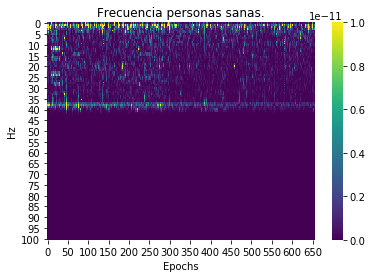

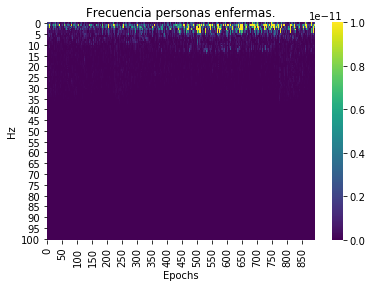

In [21]:
welch80 = sp.signal.welch(elect80_sano, noverlap=100, fs=250)
sn.heatmap(np.transpose(welch80[1]), cmap='viridis', vmax=1e-11,  xticklabels = 50, yticklabels=5)
plt.title("Frecuencia personas sanas.")
plt.ylabel("Hz")
plt.xlabel("Epochs")
plt.show()

welch80 = sp.signal.welch(elect80_enfermo, noverlap=100, fs=250)
sn.heatmap(np.transpose(welch80[1]), cmap='viridis', vmax=1e-11,  xticklabels = 50, yticklabels=5)
plt.title("Frecuencia personas enfermas.")
plt.ylabel("Hz")
plt.xlabel("Epochs")
plt.show()

Como podemos ver, en las personas sanas, el espectograma nos presenta una mayor cantidad de frecuencias presentes a lo largo del tiempo. En las personas enfermas, solo las frecuencias mas altas se encuentran presentes.

### Ejercicio a.2
Calcular la potencia media (entre epochs) para cada frecuencia y graficar la potencia en funcion de la frecuencia para cada canal.

In [12]:
welch8 = sp.signal.welch(df8_Media, noverlap=100, fs=250)
welch44 = sp.signal.welch(df44_Media, noverlap=100, fs=250)
welch80 = sp.signal.welch(df80_Media, noverlap=100, fs=250)
welch131 = sp.signal.welch(df131_Media, noverlap=100, fs=250)
welch185 = sp.signal.welch(df185_Media, noverlap=100, fs=250)

trace1 = Scatter(x=welch8[0], y=welch8[1], name='Media FFT 8')
trace2 = Scatter(x=welch44[0], y=welch44[1], name='Media FFT 44')
trace3 = Scatter(x=welch80[0], y=welch80[1], name='Media FFT 80')
trace4 = Scatter(x=welch131[0], y=welch131[1], name='Media FFT 131')
trace5 = Scatter(x=welch185[0], y=welch185[1], name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud para personas sanas',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')



/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



In [13]:
welch8_enfermo = sp.signal.welch(df8_Media_enfermo, noverlap=100, fs=250)
welch44_enfermo = sp.signal.welch(df44_Media_enfermo, noverlap=100, fs=250)
welch80_enfermo = sp.signal.welch(df80_Media_enfermo, noverlap=100, fs=250)
welch131_enfermo = sp.signal.welch(df131_Media_enfermo, noverlap=100, fs=250)
welch185_enfermo = sp.signal.welch(df185_Media_enfermo, noverlap=100, fs=250)

trace1 = Scatter(x=welch8_enfermo[0], y=welch8_enfermo[1], name='Media FFT 8')
trace2 = Scatter(x=welch44_enfermo[0], y=welch44_enfermo[1], name='Media FFT 44')
trace3 = Scatter(x=welch80_enfermo[0], y=welch80_enfermo[1], name='Media FFT 80')
trace4 = Scatter(x=welch131_enfermo[0], y=welch131_enfermo[1], name='Media FFT 131')
trace5 = Scatter(x=welch185_enfermo[0], y=welch185_enfermo[1], name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud para personas enfermas',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



### Ejercicio b
Calcular los valores de cada banda de frecuencia, promediados entre los electrodos (todos) y epochs para cada sujeto.

In [14]:
def calcular_frecuencias_vs_amplitud_en_banda(fft, low_bound, top_bound):
    frecuencia_delta = [f for f in list(fft[0]) if low_bound <= f < top_bound]
    low_index = list(fft[0]).index(frecuencia_delta[0])
    top_index = list(fft[0]).index(frecuencia_delta[-1])

    amplitud_delta = fft[1][low_index:top_index+1]
    
    return (frecuencia_delta, amplitud_delta)

In [15]:
frecuencia_electrodo_8_delta, amplitud_electrodo_8_delta = calcular_frecuencias_vs_amplitud_en_banda(welch8, 0, 4)
frecuencia_electrodo_44_delta, amplitud_electrodo_44_delta = calcular_frecuencias_vs_amplitud_en_banda(welch44, 0, 4)
frecuencia_electrodo_80_delta, amplitud_electrodo_80_delta = calcular_frecuencias_vs_amplitud_en_banda(welch80, 0, 4)
frecuencia_electrodo_131_delta, amplitud_electrodo_131_delta = calcular_frecuencias_vs_amplitud_en_banda(welch131, 0, 4)
frecuencia_electrodo_185_delta, amplitud_electrodo_185_delta = calcular_frecuencias_vs_amplitud_en_banda(welch185,0, 4)

trace1 = Scatter(x=frecuencia_electrodo_8_delta, y=amplitud_electrodo_8_delta, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_delta, y=amplitud_electrodo_44_delta, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_delta, y=amplitud_electrodo_80_delta, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_delta, y=amplitud_electrodo_131_delta, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_delta, y=amplitud_electrodo_185_delta, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Delta en una persona sana',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [16]:
frecuencia_electrodo_8_delta_enfermo, amplitud_electrodo_8_delta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch8_enfermo, 0, 4)
frecuencia_electrodo_44_delta_enfermo, amplitud_electrodo_44_delta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch44_enfermo, 0, 4)
frecuencia_electrodo_80_delta_enfermo, amplitud_electrodo_80_delta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch80_enfermo, 0, 4)
frecuencia_electrodo_131_delta_enfermo, amplitud_electrodo_131_delta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch131_enfermo, 0, 4)
frecuencia_electrodo_185_delta_enfermo, amplitud_electrodo_185_delta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch185_enfermo,0, 4)

trace1 = Scatter(x=frecuencia_electrodo_8_delta_enfermo, y=amplitud_electrodo_8_delta_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_delta_enfermo, y=amplitud_electrodo_44_delta_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_delta_enfermo, y=amplitud_electrodo_80_delta_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_delta_enfermo, y=amplitud_electrodo_131_delta_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_delta_enfermo, y=amplitud_electrodo_185_delta_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Delta en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [17]:
frecuencia_electrodo_8_theta, amplitud_electrodo_8_theta = calcular_frecuencias_vs_amplitud_en_banda(welch8, 4, 8)
frecuencia_electrodo_44_theta, amplitud_electrodo_44_theta = calcular_frecuencias_vs_amplitud_en_banda(welch44, 4, 8)
frecuencia_electrodo_80_theta, amplitud_electrodo_80_theta = calcular_frecuencias_vs_amplitud_en_banda(welch80, 4, 8)
frecuencia_electrodo_131_theta, amplitud_electrodo_131_theta = calcular_frecuencias_vs_amplitud_en_banda(welch131, 4, 8)
frecuencia_electrodo_185_theta, amplitud_electrodo_185_theta = calcular_frecuencias_vs_amplitud_en_banda(welch185, 4, 8)

trace1 = Scatter(x=frecuencia_electrodo_8_theta, y=amplitud_electrodo_8_theta, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_theta, y=amplitud_electrodo_44_theta, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_theta, y=amplitud_electrodo_80_theta, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_theta, y=amplitud_electrodo_131_theta, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_theta, y=amplitud_electrodo_185_theta, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Theta en una persona sana',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [18]:
frecuencia_electrodo_8_theta_enfermo, amplitud_electrodo_8_theta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch8_enfermo, 4, 8)
frecuencia_electrodo_44_theta_enfermo, amplitud_electrodo_44_theta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch44_enfermo, 4, 8)
frecuencia_electrodo_80_theta_enfermo, amplitud_electrodo_80_theta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch80_enfermo, 4, 8)
frecuencia_electrodo_131_theta_enfermo, amplitud_electrodo_131_theta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch131_enfermo, 4, 8)
frecuencia_electrodo_185_theta_enfermo, amplitud_electrodo_185_theta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch185_enfermo, 4, 8)

trace1 = Scatter(x=frecuencia_electrodo_8_theta_enfermo, y=amplitud_electrodo_8_theta_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_theta_enfermo, y=amplitud_electrodo_44_theta_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_theta_enfermo, y=amplitud_electrodo_80_theta_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_theta_enfermo, y=amplitud_electrodo_131_theta_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_theta_enfermo, y=amplitud_electrodo_185_theta_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Theta en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [19]:
frecuencia_electrodo_8_alpha, amplitud_electrodo_8_alpha = calcular_frecuencias_vs_amplitud_en_banda(welch8, 8, 13)
frecuencia_electrodo_44_alpha, amplitud_electrodo_44_alpha = calcular_frecuencias_vs_amplitud_en_banda(welch44, 8, 13)
frecuencia_electrodo_80_alpha, amplitud_electrodo_80_alpha = calcular_frecuencias_vs_amplitud_en_banda(welch80, 8, 13)
frecuencia_electrodo_131_alpha, amplitud_electrodo_131_alpha = calcular_frecuencias_vs_amplitud_en_banda(welch131, 8, 13)
frecuencia_electrodo_185_alpha, amplitud_electrodo_185_alpha = calcular_frecuencias_vs_amplitud_en_banda(welch185, 8, 13)

trace1 = Scatter(x=frecuencia_electrodo_8_alpha, y=amplitud_electrodo_8_alpha, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_alpha, y=amplitud_electrodo_44_alpha, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_alpha, y=amplitud_electrodo_80_alpha, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_alpha, y=amplitud_electrodo_131_alpha, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_alpha, y=amplitud_electrodo_185_alpha, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Alpha en una persona sana',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [20]:
frecuencia_electrodo_8_alpha_enfermo, amplitud_electrodo_8_alpha_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch8_enfermo, 8, 13)
frecuencia_electrodo_44_alpha_enfermo, amplitud_electrodo_44_alpha_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch44_enfermo, 8, 13)
frecuencia_electrodo_80_alpha_enfermo, amplitud_electrodo_80_alpha_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch80_enfermo, 8, 13)
frecuencia_electrodo_131_alpha_enfermo, amplitud_electrodo_131_alpha_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch131_enfermo, 8, 13)
frecuencia_electrodo_185_alpha_enfermo, amplitud_electrodo_185_alpha_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch185_enfermo, 8, 13)

trace1 = Scatter(x=frecuencia_electrodo_8_alpha_enfermo, y=amplitud_electrodo_8_alpha_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_alpha_enfermo, y=amplitud_electrodo_44_alpha_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_alpha_enfermo, y=amplitud_electrodo_80_alpha_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_alpha_enfermo, y=amplitud_electrodo_131_alpha_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_alpha_enfermo, y=amplitud_electrodo_185_alpha_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Alpha en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [21]:
frecuencia_electrodo_8_beta, amplitud_electrodo_8_beta = calcular_frecuencias_vs_amplitud_en_banda(welch8, 13, 30)
frecuencia_electrodo_44_beta, amplitud_electrodo_44_beta = calcular_frecuencias_vs_amplitud_en_banda(welch44, 13, 30)
frecuencia_electrodo_80_beta, amplitud_electrodo_80_beta = calcular_frecuencias_vs_amplitud_en_banda(welch80, 13, 30)
frecuencia_electrodo_131_beta, amplitud_electrodo_131_beta = calcular_frecuencias_vs_amplitud_en_banda(welch131, 13, 30)
frecuencia_electrodo_185_beta, amplitud_electrodo_185_beta = calcular_frecuencias_vs_amplitud_en_banda(welch185, 13, 30)

trace1 = Scatter(x=frecuencia_electrodo_8_beta, y=amplitud_electrodo_8_beta, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_beta, y=amplitud_electrodo_44_beta, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_beta, y=amplitud_electrodo_80_beta, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_beta, y=amplitud_electrodo_131_beta, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_beta, y=amplitud_electrodo_185_beta, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Beta en una persona sana',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [22]:
frecuencia_electrodo_8_beta_enfermo, amplitud_electrodo_8_beta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch8_enfermo, 13, 30)
frecuencia_electrodo_44_beta_enfermo, amplitud_electrodo_44_beta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch44_enfermo, 13, 30)
frecuencia_electrodo_80_beta_enfermo, amplitud_electrodo_80_beta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch80_enfermo, 13, 30)
frecuencia_electrodo_131_beta_enfermo, amplitud_electrodo_131_beta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch131_enfermo, 13, 30)
frecuencia_electrodo_185_beta_enfermo, amplitud_electrodo_185_beta_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch185_enfermo, 13, 30)

trace1 = Scatter(x=frecuencia_electrodo_8_beta_enfermo, y=amplitud_electrodo_8_beta_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_beta_enfermo, y=amplitud_electrodo_44_beta_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_beta_enfermo, y=amplitud_electrodo_80_beta_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_beta_enfermo, y=amplitud_electrodo_131_beta_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_beta_enfermo, y=amplitud_electrodo_185_beta_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Beta en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [23]:
frecuencia_electrodo_8_gamma, amplitud_electrodo_8_gamma = calcular_frecuencias_vs_amplitud_en_banda(welch8, 30, 45)
frecuencia_electrodo_44_gamma, amplitud_electrodo_44_gamma = calcular_frecuencias_vs_amplitud_en_banda(welch44, 30, 45)
frecuencia_electrodo_80_gamma, amplitud_electrodo_80_gamma = calcular_frecuencias_vs_amplitud_en_banda(welch80, 30, 45)
frecuencia_electrodo_131_gamma, amplitud_electrodo_131_gamma = calcular_frecuencias_vs_amplitud_en_banda(welch131, 30, 45)
frecuencia_electrodo_185_gamma, amplitud_electrodo_185_gamma = calcular_frecuencias_vs_amplitud_en_banda(welch185, 30, 45)

trace1 = Scatter(x=frecuencia_electrodo_8_gamma, y=amplitud_electrodo_8_gamma, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_gamma, y=amplitud_electrodo_44_gamma, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_gamma, y=amplitud_electrodo_80_gamma, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_gamma, y=amplitud_electrodo_131_gamma, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_gamma, y=amplitud_electrodo_185_gamma, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Gamma en una persona sana',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [24]:
frecuencia_electrodo_8_gamma_enfermo, amplitud_electrodo_8_gamma_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch8_enfermo, 30, 45)
frecuencia_electrodo_44_gamma_enfermo, amplitud_electrodo_44_gamma_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch44_enfermo, 30, 45)
frecuencia_electrodo_80_gamma_enfermo, amplitud_electrodo_80_gamma_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch80_enfermo, 30, 45)
frecuencia_electrodo_131_gamma_enfermo, amplitud_electrodo_131_gamma_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch131_enfermo, 30, 45)
frecuencia_electrodo_185_gamma_enfermo, amplitud_electrodo_185_gamma_enfermo = calcular_frecuencias_vs_amplitud_en_banda(welch185_enfermo, 30, 45)

trace1 = Scatter(x=frecuencia_electrodo_8_gamma_enfermo, y=amplitud_electrodo_8_gamma_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_gamma_enfermo, y=amplitud_electrodo_44_gamma_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_gamma_enfermo, y=amplitud_electrodo_80_gamma_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_gamma_enfermo, y=amplitud_electrodo_131_gamma_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_gamma_enfermo, y=amplitud_electrodo_185_gamma_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Gamma en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)



plotly.offline.iplot(fig, filename='media-eeg-8')

Calculemos el promedio:

In [25]:
promedio_de_amplitudes_delta = (amplitud_electrodo_8_delta + amplitud_electrodo_44_delta + amplitud_electrodo_80_delta + amplitud_electrodo_131_delta + amplitud_electrodo_185_delta) / 5
promedio_de_amplitudes_theta = (amplitud_electrodo_8_theta + amplitud_electrodo_44_theta + amplitud_electrodo_80_theta + amplitud_electrodo_131_theta + amplitud_electrodo_185_theta) / 5
promedio_de_amplitudes_alpha = (amplitud_electrodo_8_alpha + amplitud_electrodo_44_alpha + amplitud_electrodo_80_alpha + amplitud_electrodo_131_alpha + amplitud_electrodo_185_alpha) / 5
promedio_de_amplitudes_beta = (amplitud_electrodo_8_beta + amplitud_electrodo_44_beta + amplitud_electrodo_80_beta + amplitud_electrodo_131_beta + amplitud_electrodo_185_beta) / 5
promedio_de_amplitudes_gamma = (amplitud_electrodo_8_gamma + amplitud_electrodo_44_gamma + amplitud_electrodo_80_gamma + amplitud_electrodo_131_gamma + amplitud_electrodo_185_gamma) / 5

trace1 = Scatter(x=frecuencia_electrodo_131_delta, y=promedio_de_amplitudes_delta, name='Media FFT delta')
trace2 = Scatter(x=frecuencia_electrodo_131_theta, y=promedio_de_amplitudes_theta, name='Media FFT theta')
trace3 = Scatter(x=frecuencia_electrodo_131_alpha, y=promedio_de_amplitudes_alpha, name='Media FFT alpha')
trace4 = Scatter(x=frecuencia_electrodo_131_beta, y=promedio_de_amplitudes_beta, name='Media FFT beta')
trace5 = Scatter(x=frecuencia_electrodo_131_gamma, y=promedio_de_amplitudes_gamma, name='Media FFT gamma')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud en una persona sana',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [26]:
promedio_de_amplitudes_delta_enfermo = (amplitud_electrodo_8_delta_enfermo + amplitud_electrodo_44_delta_enfermo + amplitud_electrodo_80_delta_enfermo + amplitud_electrodo_131_delta_enfermo + amplitud_electrodo_185_delta_enfermo) / 5
promedio_de_amplitudes_theta_enfermo = (amplitud_electrodo_8_theta_enfermo + amplitud_electrodo_44_theta_enfermo + amplitud_electrodo_80_theta_enfermo + amplitud_electrodo_131_theta_enfermo + amplitud_electrodo_185_theta_enfermo) / 5
promedio_de_amplitudes_alpha_enfermo = (amplitud_electrodo_8_alpha_enfermo + amplitud_electrodo_44_alpha_enfermo + amplitud_electrodo_80_alpha_enfermo + amplitud_electrodo_131_alpha_enfermo + amplitud_electrodo_185_alpha_enfermo) / 5
promedio_de_amplitudes_beta_enfermo = (amplitud_electrodo_8_beta_enfermo + amplitud_electrodo_44_beta_enfermo + amplitud_electrodo_80_beta_enfermo + amplitud_electrodo_131_beta_enfermo + amplitud_electrodo_185_beta_enfermo) / 5
promedio_de_amplitudes_gamma_enfermo = (amplitud_electrodo_8_gamma_enfermo + amplitud_electrodo_44_gamma_enfermo + amplitud_electrodo_80_gamma_enfermo + amplitud_electrodo_131_gamma_enfermo + amplitud_electrodo_185_gamma_enfermo) / 5

trace1 = Scatter(x=frecuencia_electrodo_131_delta_enfermo, y=promedio_de_amplitudes_delta_enfermo, name='Media FFT delta')
trace2 = Scatter(x=frecuencia_electrodo_131_theta_enfermo, y=promedio_de_amplitudes_theta_enfermo, name='Media FFT theta')
trace3 = Scatter(x=frecuencia_electrodo_131_alpha_enfermo, y=promedio_de_amplitudes_alpha_enfermo, name='Media FFT alpha')
trace4 = Scatter(x=frecuencia_electrodo_131_beta_enfermo, y=promedio_de_amplitudes_beta_enfermo, name='Media FFT beta')
trace5 = Scatter(x=frecuencia_electrodo_131_gamma_enfermo, y=promedio_de_amplitudes_gamma_enfermo, name='Media FFT gamma')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [27]:
promedio_de_amplitudes_delta = (amplitud_electrodo_8_delta + amplitud_electrodo_44_delta + amplitud_electrodo_80_delta + amplitud_electrodo_131_delta + amplitud_electrodo_185_delta) / 5
promedio_de_amplitudes_theta = (amplitud_electrodo_8_theta + amplitud_electrodo_44_theta + amplitud_electrodo_80_theta + amplitud_electrodo_131_theta + amplitud_electrodo_185_theta) / 5
promedio_de_amplitudes_alpha = (amplitud_electrodo_8_alpha + amplitud_electrodo_44_alpha + amplitud_electrodo_80_alpha + amplitud_electrodo_131_alpha + amplitud_electrodo_185_alpha) / 5
promedio_de_amplitudes_beta = (amplitud_electrodo_8_beta + amplitud_electrodo_44_beta + amplitud_electrodo_80_beta + amplitud_electrodo_131_beta + amplitud_electrodo_185_beta) / 5
promedio_de_amplitudes_gamma = (amplitud_electrodo_8_gamma + amplitud_electrodo_44_gamma + amplitud_electrodo_80_gamma + amplitud_electrodo_131_gamma + amplitud_electrodo_185_gamma) / 5
promedio_de_amplitudes_delta_enfermo = (amplitud_electrodo_8_delta_enfermo + amplitud_electrodo_44_delta_enfermo + amplitud_electrodo_80_delta_enfermo + amplitud_electrodo_131_delta_enfermo + amplitud_electrodo_185_delta_enfermo) / 5
promedio_de_amplitudes_theta_enfermo = (amplitud_electrodo_8_theta_enfermo + amplitud_electrodo_44_theta_enfermo + amplitud_electrodo_80_theta_enfermo + amplitud_electrodo_131_theta_enfermo + amplitud_electrodo_185_theta_enfermo) / 5
promedio_de_amplitudes_alpha_enfermo = (amplitud_electrodo_8_alpha_enfermo + amplitud_electrodo_44_alpha_enfermo + amplitud_electrodo_80_alpha_enfermo + amplitud_electrodo_131_alpha_enfermo + amplitud_electrodo_185_alpha_enfermo) / 5
promedio_de_amplitudes_beta_enfermo = (amplitud_electrodo_8_beta_enfermo + amplitud_electrodo_44_beta_enfermo + amplitud_electrodo_80_beta_enfermo + amplitud_electrodo_131_beta_enfermo + amplitud_electrodo_185_beta_enfermo) / 5
promedio_de_amplitudes_gamma_enfermo = (amplitud_electrodo_8_gamma_enfermo + amplitud_electrodo_44_gamma_enfermo + amplitud_electrodo_80_gamma_enfermo + amplitud_electrodo_131_gamma_enfermo + amplitud_electrodo_185_gamma_enfermo) / 5


trace1 = Scatter(x=frecuencia_electrodo_131_delta, y=promedio_de_amplitudes_delta, name='Media FFT delta')
trace2 = Scatter(x=frecuencia_electrodo_131_theta, y=promedio_de_amplitudes_theta, name='Media FFT theta')
trace3 = Scatter(x=frecuencia_electrodo_131_alpha, y=promedio_de_amplitudes_alpha, name='Media FFT alpha')
trace4 = Scatter(x=frecuencia_electrodo_131_beta, y=promedio_de_amplitudes_beta, name='Media FFT beta')
trace5 = Scatter(x=frecuencia_electrodo_131_gamma, y=promedio_de_amplitudes_gamma, name='Media FFT gamma')
trace6 = Scatter(x=frecuencia_electrodo_131_delta_enfermo, y=promedio_de_amplitudes_delta_enfermo, name='Media FFT delta enfermo')
trace7 = Scatter(x=frecuencia_electrodo_131_theta_enfermo, y=promedio_de_amplitudes_theta_enfermo, name='Media FFT theta enfermo')
trace8 = Scatter(x=frecuencia_electrodo_131_alpha_enfermo, y=promedio_de_amplitudes_alpha_enfermo, name='Media FFT alpha enfermo')
trace9 = Scatter(x=frecuencia_electrodo_131_beta_enfermo, y=promedio_de_amplitudes_beta_enfermo, name='Media FFT beta enfermo')
trace10 = Scatter(x=frecuencia_electrodo_131_gamma_enfermo, y=promedio_de_amplitudes_gamma_enfermo, name='Media FFT gamma enfermo')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

layout = dict(title = 'Frecuencias vs amplitud - comparacion total',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

Vamos a analizarlo con todos los pacientes.

In [28]:
def calculate_file(filename):
    m = sp.io.loadmat(filename)
    paciente_sano_10 = m['data']

    elect8 = paciente_sano_10[:,7,:]
    df8 = pd.DataFrame(elect8)

    df8_Media = df8.mean(axis=0)
    welch8 = sp.signal.welch(df8_Media, noverlap=100, fs=250)

    frecuencia_electrodo_8_delta, amplitud_electrodo_8_delta = calcular_frecuencias_vs_amplitud_en_banda(welch8, 0, 4)
    frecuencia_electrodo_8_theta, amplitud_electrodo_8_theta = calcular_frecuencias_vs_amplitud_en_banda(welch8, 4, 8)
    frecuencia_electrodo_8_alpha, amplitud_electrodo_8_alpha = calcular_frecuencias_vs_amplitud_en_banda(welch8, 8, 13)
    frecuencia_electrodo_8_beta, amplitud_electrodo_8_beta = calcular_frecuencias_vs_amplitud_en_banda(welch8, 13, 30)
    frecuencia_electrodo_8_gamma, amplitud_electrodo_8_gamma = calcular_frecuencias_vs_amplitud_en_banda(welch8, 30, 45)
    
    return [(frecuencia_electrodo_8_delta, amplitud_electrodo_8_delta), (frecuencia_electrodo_8_theta, amplitud_electrodo_8_theta), (frecuencia_electrodo_8_alpha, amplitud_electrodo_8_alpha), (frecuencia_electrodo_8_beta, amplitud_electrodo_8_beta), (frecuencia_electrodo_8_gamma, amplitud_electrodo_8_gamma)]

In [29]:
def calcular_pacientes_sanos():
    paciente_sano_1 = calculate_file('S01.mat')
    paciente_sano_2 = calculate_file('S02.mat')
    paciente_sano_3 = calculate_file('S03.mat')
    paciente_sano_4 = calculate_file('S04.mat')
    paciente_sano_5 = calculate_file('S05.mat')
    paciente_sano_6 = calculate_file('S06.mat')
    paciente_sano_7 = calculate_file('S07.mat')
    paciente_sano_8 = calculate_file('S08.mat')
    paciente_sano_9 = calculate_file('S09.mat')
    paciente_sano_10 = calculate_file('S10.mat')
    
    return [paciente_sano_1, paciente_sano_2, paciente_sano_3, paciente_sano_4, paciente_sano_5, paciente_sano_6, paciente_sano_7, paciente_sano_8, paciente_sano_9, paciente_sano_10]

def calcular_pacientes_enfermos():
    paciente_enfermo_1 = calculate_file('P01.mat')
    paciente_enfermo_2 = calculate_file('P02.mat')
    paciente_enfermo_3 = calculate_file('P03.mat')
    paciente_enfermo_4 = calculate_file('P04.mat')
    paciente_enfermo_5 = calculate_file('P05.mat')
    paciente_enfermo_6 = calculate_file('P06.mat')
    paciente_enfermo_7 = calculate_file('P07.mat')
    paciente_enfermo_8 = calculate_file('P08.mat')
    paciente_enfermo_9 = calculate_file('P09.mat')
    paciente_enfermo_10 = calculate_file('P10.mat')
    
    return [paciente_enfermo_1, paciente_enfermo_2, paciente_enfermo_3, paciente_enfermo_4, paciente_enfermo_5, paciente_enfermo_6, paciente_enfermo_7, paciente_enfermo_8, paciente_enfermo_9, paciente_enfermo_10]

def calcular_promedio_para_todos_los_pacientes_para_banda(i):
    pacientes_sanos = calcular_pacientes_sanos()
    pacientes_enfermos = calcular_pacientes_enfermos()
    
    pacientes_sanos_para_banda = [paciente[i] for paciente in pacientes_sanos]
    paciente_sano_promedio_banda = sum([paciente[1] for paciente in pacientes_sanos_para_banda])/ len(pacientes_sanos_para_banda)
    
    pacientes_enfermos_para_banda = [paciente[i] for paciente in pacientes_enfermos]
    paciente_enfermo_promedio_banda = sum([paciente[1] for paciente in pacientes_enfermos_para_banda])/ len(pacientes_enfermos_para_banda)
    
    return paciente_sano_promedio_banda, paciente_enfermo_promedio_banda
    
    

In [30]:
paciente_sano_promedio_delta, paciente_enfermo_promedio_delta = calcular_promedio_para_todos_los_pacientes_para_banda(0)
paciente_sano_promedio_theta, paciente_enfermo_promedio_theta = calcular_promedio_para_todos_los_pacientes_para_banda(1)
paciente_sano_promedio_alpha, paciente_enfermo_promedio_alpha = calcular_promedio_para_todos_los_pacientes_para_banda(2)
paciente_sano_promedio_beta, paciente_enfermo_promedio_beta = calcular_promedio_para_todos_los_pacientes_para_banda(3)
paciente_sano_promedio_gamma, paciente_enfermo_promedio_gamma = calcular_promedio_para_todos_los_pacientes_para_banda(4)


trace1 = Scatter(x=frecuencia_electrodo_8_delta, y=paciente_sano_promedio_delta, name='Media FFT delta sanos')
trace2 = Scatter(x=frecuencia_electrodo_8_delta, y=paciente_enfermo_promedio_delta, name='Media FFT delta enfermos')
trace3 = Scatter(x=frecuencia_electrodo_8_theta, y=paciente_sano_promedio_theta, name='Media FFT theta sanos')
trace4 = Scatter(x=frecuencia_electrodo_8_theta, y=paciente_enfermo_promedio_theta, name='Media FFT theta enfermos')
trace5 = Scatter(x=frecuencia_electrodo_8_alpha, y=paciente_sano_promedio_alpha, name='Media FFT alpha sanos')
trace6 = Scatter(x=frecuencia_electrodo_8_alpha, y=paciente_enfermo_promedio_alpha, name='Media FFT alpha enfermos')
trace7 = Scatter(x=frecuencia_electrodo_8_beta, y=paciente_sano_promedio_beta, name='Media FFT beta sanos')
trace8 = Scatter(x=frecuencia_electrodo_8_beta, y=paciente_enfermo_promedio_beta, name='Media FFT beta enfermos')
trace9 = Scatter(x=frecuencia_electrodo_8_gamma, y=paciente_sano_promedio_gamma, name='Media FFT gamma sanos')
trace10 = Scatter(x=frecuencia_electrodo_8_gamma, y=paciente_enfermo_promedio_gamma, name='Media FFT gamma enfermos')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace7, trace8, trace9, trace10]

layout = dict(title = 'Frecuencias vs amplitud: Promedio de electrodo 8 para pacientes sanos y enfermos',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



### Ejercicio c
Tomar la potencia de cada sujeto en la banda Alpha y graficar cada uno de los gráficos categóricos de seaborn. ¿Cuál recomendaría para graficar y comparar distribuciones?

A continuación analizaremos todos los gráficos categóricos que provee seaborn y veremos cuál nos compete para nuestro análisis.

Comencemos con **stripplot**: para poder realizar este gráfico necesitamos tener una variable categórica. Una variable categórica es una variable que puede tomar valores dentro de un rango finito. En nuestro caso tomaremos a esta variable como alpha, ya que la misma toma valores entre 8 y 13 Hz.

Es un gráfico simple que sirve para mostrar los valores diferenciados por el rango de la variable categórica.

In [32]:
pacientes_sanos = calcular_pacientes_sanos()
pacientes_enfermos = calcular_pacientes_enfermos()

def calcular_amplitudes_alpha():    
    amplitudes_pacientes_sanos_para_alpha = [paciente[2][1] for paciente in pacientes_sanos]
    frecuencias_pacientes_sanos_para_alpha = [paciente[2][0] for paciente in pacientes_sanos]
    amplitudes_pacientes_enfermos_para_alpha = [paciente[2][1] for paciente in pacientes_enfermos]
    frecuencias_pacientes_enfermos_para_alpha = [paciente[2][0] for paciente in pacientes_enfermos]
    
    
    flat_amplitudes_pacientes_sanos_para_alpha = np.concatenate(amplitudes_pacientes_sanos_para_alpha).ravel()
    flat_amplitudes_pacientes_enfermos_para_alpha = np.concatenate(amplitudes_pacientes_enfermos_para_alpha).ravel()
    flat_frecuencias_pacientes_sanos_para_alpha = np.concatenate(frecuencias_pacientes_sanos_para_alpha).ravel()
    flat_frecuencias_pacientes_enfermos_para_alpha = np.concatenate(frecuencias_pacientes_enfermos_para_alpha).ravel()
    
    amplitudes = np.append(flat_amplitudes_pacientes_sanos_para_alpha, flat_amplitudes_pacientes_enfermos_para_alpha)
    frecuencias = np.append(flat_frecuencias_pacientes_sanos_para_alpha, flat_frecuencias_pacientes_enfermos_para_alpha)
    return frecuencias, amplitudes


frecuencias_alpha, amplitudes_alpha = calcular_amplitudes_alpha()
 
df = pd.DataFrame({'Amplitudes': amplitudes_alpha, 'Alpha': frecuencias_alpha})

/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



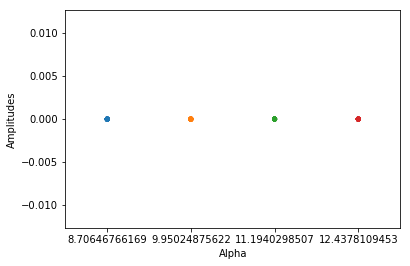

In [33]:
sn.stripplot(x="Alpha", y="Amplitudes", data=df)
plt.show()

Se dificulta ver la distribución de los datos ya que muchos de los puntos se superponen. Para mejorar esto podemos ajustar las posiciones usando jitter

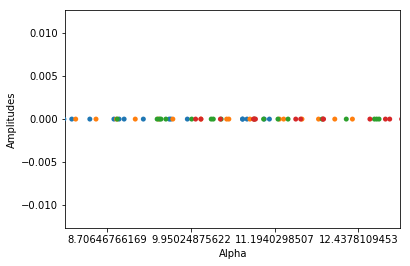

In [34]:
sn.stripplot(x="Alpha", y="Amplitudes", data=df, jitter=2)
plt.show()

Seguimos con **swarmplot**. Este gráfico es similar a stripplot, con la diferencia que se ajustan los puntos para que no queden superpuestos.

En el primer caso de stripplot se dificultaba ver la distribución de los datos y agregamos jitter para mejorar esta situación. Otra posible solución es utilizar swarmplot.

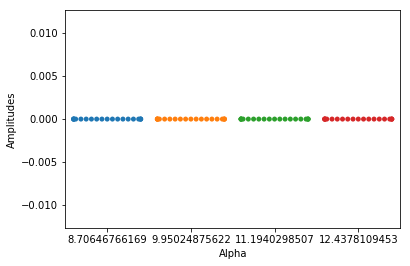

In [35]:
sn.swarmplot(x="Alpha", y="Amplitudes", data=df);
plt.show()

Los gráficos que presentaremos a continuación resumen de alguna forma nuestra información.

Ahora segimos con **boxplot**, que muestra las distribuciones con respecto a categorías. Permite una fácil comparación entre las variables y los niveles de la variable categórica. El 'box' muestra los cuartiles del dataset. Las líneas (o wiskers) muestran el más bajo y más alto cuartil.

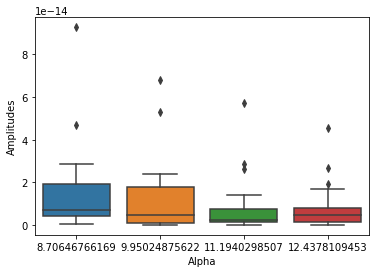

In [36]:
sn.boxplot(x="Alpha", y="Amplitudes", data=df);
plt.show()

Por otro lado, **violinplot** tiene un rol similar a boxplot. Muestra la distribucion de la informacion dentro de distintos niveles de la variable categorica propuesta.

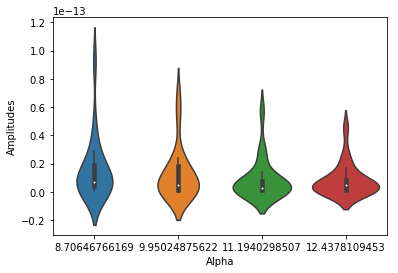

In [37]:
sn.violinplot(x="Alpha", y="Amplitudes", data=df);
plt.show()

**Lvplot** (letter value plot) es un grafico para mostrar la distribucion de datasets grandes. 

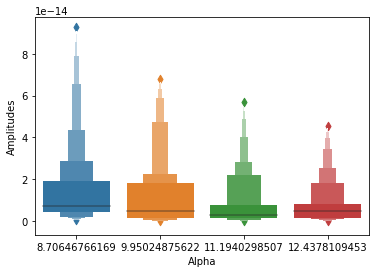

In [38]:
sn.lvplot(x="Alpha", y="Amplitudes", data=df);
plt.show()

El grafico generado por **pointplot** muestra estimaciones puntuales e intervalos de confianza. Muestra la interacción entre las variables.

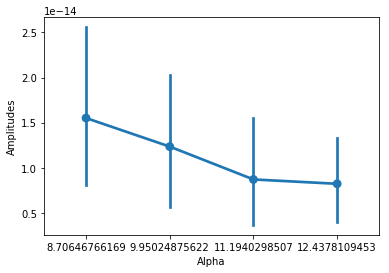

In [39]:
sn.pointplot(x="Alpha", y="Amplitudes", data=df);
plt.show()

Podríamos querer analizar otras características de los datos, como por ejemplo la tendencia de los valores. Para lograr esto podemos utilizar barplot o countplot.

**Barplot** muestra las estimaciones puntuales y los intervalos de confianza como barras rectangulares. Muestra una estimación usando al promedio como default.

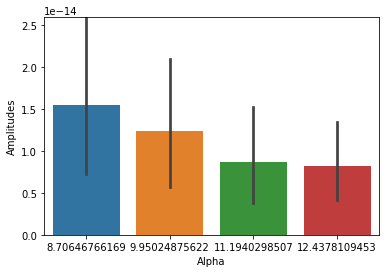

In [40]:
sn.barplot(x='Alpha', y='Amplitudes', data=df);
plt.show()

Por último, vemos **countplot**. Es un caso especial de boxplot, donde queremos mostrar la cantidad de observaciones dentro de cada categoría.

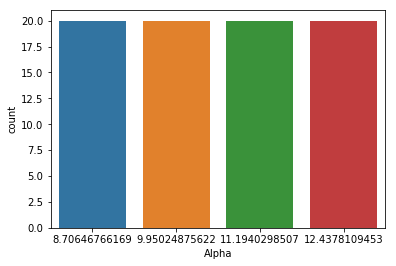

In [41]:
sn.countplot(x='Alpha', data=df);
plt.show()

Con stripplot y swarmplot podemos ver como se distribuyen las amplitudes con respecto a los valores de alpha. 

Por otro lado, boxplot se utiliza para mostar la distribución de los datos, pero como podemos ver en este [artículo](https://www.autodeskresearch.com/publications/samestats) el gráfico resultante de boxplot resulta el mismo para distintas distribuciones de datos. Es por esto que vamos a descartarlo para nuestro análisis, ya que si bien nos muestra propiedades de los datos, no nos muestra la distribución de los mismos. Lvplot es análogo a boxplot solo que se utiliza para grandes datasets.

Además, vimos violinplot que es semejante a boxplot pero utiliza una estimada distinta para proveer una mejor descripción de la distribución de los valores.

Por último vimos gráficos para ver la tendencia de los datos.

Para elegir que gráfico queremos utilizar tenemos que pensar en que nos interesa mostrar. Nuestro objetivo es ver la distribución de los datos y para ello elegimos violinplot. Este nos ofrece la información que stripplot y swarmplot ya que nos muestra la distribución de los datos con respecto a la variable alpha. Y además nos permite ver la densidad de los datos para cada valor de amplitud.

Los gráficos restantes los descartamos ya que no nos interesa la tendencia en este caso.

### Ejercicio d
Para cada banda de frecuencia, graficar según lo elegido en el punto c) y realizar un test estadístico apropiado.

Comencemos obteniendo los datos a graficar:

In [42]:
pacientes_sanos = calcular_pacientes_sanos()
pacientes_enfermos = calcular_pacientes_enfermos()

# i=0 delta, i=1 theta, i=2 alpha, i=3 beta, i=4 gamma
def calcular_amplitudes_para_banda(i):    
    amplitudes_pacientes_sanos_para_alpha = [paciente[i][1] for paciente in pacientes_sanos]
    frecuencias_pacientes_sanos_para_alpha = [paciente[i][0] for paciente in pacientes_sanos]
    amplitudes_pacientes_enfermos_para_alpha = [paciente[i][1] for paciente in pacientes_enfermos]
    frecuencias_pacientes_enfermos_para_alpha = [paciente[i][0] for paciente in pacientes_enfermos]
    
    
    flat_amplitudes_pacientes_sanos_para_alpha = np.concatenate(amplitudes_pacientes_sanos_para_alpha).ravel()
    flat_amplitudes_pacientes_enfermos_para_alpha = np.concatenate(amplitudes_pacientes_enfermos_para_alpha).ravel()
    flat_frecuencias_pacientes_sanos_para_alpha = np.concatenate(frecuencias_pacientes_sanos_para_alpha).ravel()
    flat_frecuencias_pacientes_enfermos_para_alpha = np.concatenate(frecuencias_pacientes_enfermos_para_alpha).ravel()
    
    amplitudes = np.append(flat_amplitudes_pacientes_sanos_para_alpha, flat_amplitudes_pacientes_enfermos_para_alpha)
    frecuencias = np.append(flat_frecuencias_pacientes_sanos_para_alpha, flat_frecuencias_pacientes_enfermos_para_alpha)
    return frecuencias, amplitudes

frecuencias_delta, amplitudes_delta = calcular_amplitudes_para_banda(i=0)
frecuencias_theta, amplitudes_theta = calcular_amplitudes_para_banda(i=1)
frecuencias_alpha, amplitudes_alpha = calcular_amplitudes_para_banda(i=2)
frecuencias_beta, amplitudes_beta = calcular_amplitudes_para_banda(i=3)
frecuencias_gamma, amplitudes_gamma = calcular_amplitudes_para_banda(i=4)

df_delta = pd.DataFrame({'Amplitudes': amplitudes_delta, 'Delta': frecuencias_delta})
df_theta = pd.DataFrame({'Amplitudes': amplitudes_theta, 'Theta': frecuencias_theta})
df_alpha = pd.DataFrame({'Amplitudes': amplitudes_alpha, 'Alpha': frecuencias_alpha})
df_beta = pd.DataFrame({'Amplitudes': amplitudes_beta, 'Beta': frecuencias_beta})
df_gamma = pd.DataFrame({'Amplitudes': amplitudes_gamma, 'Gamma': frecuencias_gamma})

/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



Ahora grafiquemoslo y veamos la distribución de los datos.

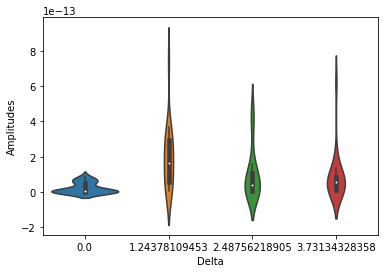

In [43]:
sn.violinplot(x="Delta", y="Amplitudes", data=df_delta);
plt.show()

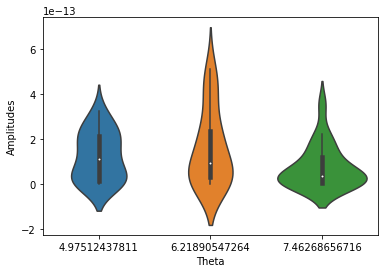

In [44]:
sn.violinplot(x="Theta", y="Amplitudes", data=df_theta);
plt.show()

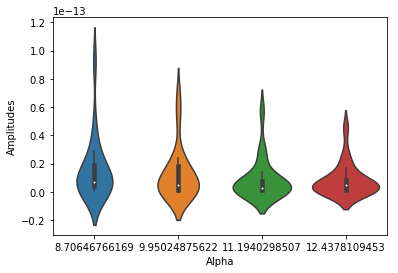

In [45]:
sn.violinplot(x="Alpha", y="Amplitudes", data=df_alpha);
plt.show()

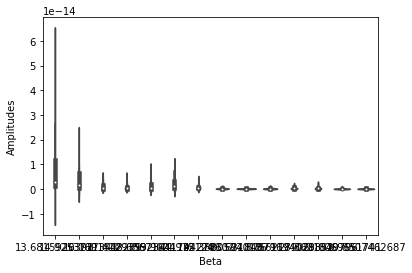

In [46]:
sn.violinplot(x="Beta", y="Amplitudes", data=df_beta);
plt.show()

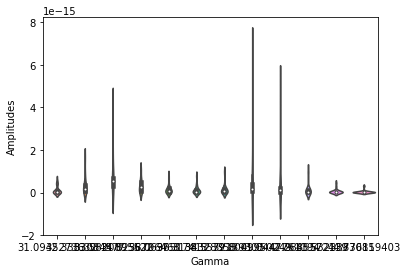

In [47]:
sn.violinplot(x="Gamma", y="Amplitudes", data=df_gamma);
plt.show()

Planteamos la siguiente hipótesis: no puedo distinguir a un paciente sano de un enfermo mediante la banda i, y vamos a analizarla para cada banda i.

In [48]:
pacientes_sanos = calcular_pacientes_sanos()
pacientes_enfermos = calcular_pacientes_enfermos()

# i=0 delta, i=1 theta, i=2 alpha, i=3 beta, i=4 gamma
def calcular_amplitudes_pacientes_sanos_para_banda_i(i):
    amplitudes_pacientes_sanos_para_alpha = [paciente[i][1] for paciente in pacientes_sanos]
    frecuencias_pacientes_sanos_para_alpha = [paciente[i][0] for paciente in pacientes_sanos]    
    
    flat_amplitudes_pacientes_sanos_para_alpha = np.concatenate(amplitudes_pacientes_sanos_para_alpha).ravel()
    flat_frecuencias_pacientes_sanos_para_alpha = np.concatenate(frecuencias_pacientes_sanos_para_alpha).ravel()
    
    return flat_frecuencias_pacientes_sanos_para_alpha, flat_amplitudes_pacientes_sanos_para_alpha


def calcular_amplitudes_pacientes_enfermos_para_banda_i(i):    
    amplitudes_pacientes_enfermos_para_alpha = [paciente[i][1] for paciente in pacientes_enfermos]
    frecuencias_pacientes_enfermos_para_alpha = [paciente[i][0] for paciente in pacientes_enfermos]
        
    flat_amplitudes_pacientes_enfermos_para_alpha = np.concatenate(amplitudes_pacientes_enfermos_para_alpha).ravel()
    flat_frecuencias_pacientes_enfermos_para_alpha = np.concatenate(frecuencias_pacientes_enfermos_para_alpha).ravel()
    
    return flat_frecuencias_pacientes_enfermos_para_alpha, flat_amplitudes_pacientes_enfermos_para_alpha

/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



In [49]:
amplitudes_sanos_delta = calcular_amplitudes_pacientes_sanos_para_banda_i(0)[1]
amplitudes_enfermos_delta = calcular_amplitudes_pacientes_enfermos_para_banda_i(0)[1]

pvalue_delta = sp.stats.ttest_ind(amplitudes_sanos_delta, amplitudes_enfermos_delta).pvalue
print("El pvalor para delta es: " + str(pvalue_delta))

El pvalor para delta es: 0.497640030658


In [50]:
amplitudes_sanos_theta = calcular_amplitudes_pacientes_sanos_para_banda_i(1)[1]
amplitudes_enfermos_theta = calcular_amplitudes_pacientes_enfermos_para_banda_i(1)[1]

pvalue_theta = sp.stats.ttest_ind(amplitudes_sanos_theta, amplitudes_enfermos_theta).pvalue
print("El pvalor para theta es: " + str(pvalue_theta))

El pvalor para theta es: 0.26365199978


In [51]:
amplitudes_sanos_alpha = calcular_amplitudes_pacientes_sanos_para_banda_i(2)[1]
amplitudes_enfermos_alpha = calcular_amplitudes_pacientes_enfermos_para_banda_i(2)[1]

pvalue_alpha = sp.stats.ttest_ind(amplitudes_sanos_alpha, amplitudes_enfermos_alpha).pvalue
print("El pvalor para alpha es: " + str(pvalue_alpha))

El pvalor para alpha es: 0.00286696614847


In [52]:
amplitudes_sanos_beta = calcular_amplitudes_pacientes_sanos_para_banda_i(3)[1]
amplitudes_enfermos_beta = calcular_amplitudes_pacientes_enfermos_para_banda_i(3)[1]

pvalue_beta = sp.stats.ttest_ind(amplitudes_sanos_beta, amplitudes_enfermos_beta).pvalue
print("El pvalor para beta es: " + str(pvalue_beta))

El pvalor para beta es: 0.0131900100137


In [53]:
amplitudes_sanos_gamma = calcular_amplitudes_pacientes_sanos_para_banda_i(4)[1]
amplitudes_enfermos_gamma = calcular_amplitudes_pacientes_enfermos_para_banda_i(4)[1]

pvalue_gamma = sp.stats.ttest_ind(amplitudes_sanos_gamma, amplitudes_enfermos_gamma).pvalue
print("El pvalor para gamma es: " + str(pvalue_gamma))

El pvalor para gamma es: 2.23332196889e-05


Como el pvalor para alpha, beta y gamma es menor a 0.05 en estos casos podemos rechazar la hipótesis y por lo tanto podemos afirmar que estas bandas pueden diferenciar los pacientes sanos de los enfermos.

### Ejercicio e
Repetir los puntos b) y d) para los valores normalizados.

Comencemos por normalizar los valores.

In [54]:
def calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(fft, low_bound, top_bound):
    frecuencia = [f for f in list(fft[0]) if low_bound <= f < top_bound]
    low_index = list(fft[0]).index(frecuencia[0])
    top_index = list(fft[0]).index(frecuencia[-1])

    amplitud = fft[1][low_index:top_index+1] / sum(fft[1])
    
    return (frecuencia, amplitud)

def calculate_file_normalizado(filename):
    m = sp.io.loadmat(filename)
    paciente_sano_10 = m['data']

    elect8 = paciente_sano_10[:,7,:]
    df8 = pd.DataFrame(elect8)

    df8_Media = df8.mean(axis=0)
    welch8 = sp.signal.welch(df8_Media, noverlap=100, fs=250)

    frecuencia_electrodo_8_delta, amplitud_electrodo_8_delta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 0, 4)
    frecuencia_electrodo_8_theta, amplitud_electrodo_8_theta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 4, 8)
    frecuencia_electrodo_8_alpha, amplitud_electrodo_8_alpha = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 8, 13)
    frecuencia_electrodo_8_beta, amplitud_electrodo_8_beta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 13, 30)
    frecuencia_electrodo_8_gamma, amplitud_electrodo_8_gamma = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 30, 45)
    
    return [(frecuencia_electrodo_8_delta, amplitud_electrodo_8_delta), (frecuencia_electrodo_8_theta, amplitud_electrodo_8_theta), (frecuencia_electrodo_8_alpha, amplitud_electrodo_8_alpha), (frecuencia_electrodo_8_beta, amplitud_electrodo_8_beta), (frecuencia_electrodo_8_gamma, amplitud_electrodo_8_gamma)]

def calcular_pacientes_sanos_normalizando():
    paciente_sano_1 = calculate_file_normalizado('S01.mat')
    paciente_sano_2 = calculate_file_normalizado('S02.mat')
    paciente_sano_3 = calculate_file_normalizado('S03.mat')
    paciente_sano_4 = calculate_file_normalizado('S04.mat')
    paciente_sano_5 = calculate_file_normalizado('S05.mat')
    paciente_sano_6 = calculate_file_normalizado('S06.mat')
    paciente_sano_7 = calculate_file_normalizado('S07.mat')
    paciente_sano_8 = calculate_file_normalizado('S08.mat')
    paciente_sano_9 = calculate_file_normalizado('S09.mat')
    paciente_sano_10 = calculate_file_normalizado('S10.mat')
    
    return [paciente_sano_1, paciente_sano_2, paciente_sano_3, paciente_sano_4, paciente_sano_5, paciente_sano_6, paciente_sano_7, paciente_sano_8, paciente_sano_9, paciente_sano_10]

def calcular_pacientes_enfermos_normalizando():
    paciente_enfermo_1 = calculate_file_normalizado('P01.mat')
    paciente_enfermo_2 = calculate_file_normalizado('P02.mat')
    paciente_enfermo_3 = calculate_file_normalizado('P03.mat')
    paciente_enfermo_4 = calculate_file_normalizado('P04.mat')
    paciente_enfermo_5 = calculate_file_normalizado('P05.mat')
    paciente_enfermo_6 = calculate_file_normalizado('P06.mat')
    paciente_enfermo_7 = calculate_file_normalizado('P07.mat')
    paciente_enfermo_8 = calculate_file_normalizado('P08.mat')
    paciente_enfermo_9 = calculate_file_normalizado('P09.mat')
    paciente_enfermo_10 = calculate_file_normalizado('P10.mat')
    
    return [paciente_enfermo_1, paciente_enfermo_2, paciente_enfermo_3, paciente_enfermo_4, paciente_enfermo_5, paciente_enfermo_6, paciente_enfermo_7, paciente_enfermo_8, paciente_enfermo_9, paciente_enfermo_10]

def calcular_promedio_normalizado_para_todos_los_pacientes_para_banda(i):
    pacientes_sanos = calcular_pacientes_sanos_normalizando()
    pacientes_enfermos = calcular_pacientes_enfermos_normalizando()
    
    pacientes_sanos_para_banda = [paciente[i] for paciente in pacientes_sanos]
    paciente_sano_promedio_banda = sum([paciente[1] for paciente in pacientes_sanos_para_banda])/ len(pacientes_sanos_para_banda)
    
    pacientes_enfermos_para_banda = [paciente[i] for paciente in pacientes_enfermos]
    paciente_enfermo_promedio_banda = sum([paciente[1] for paciente in pacientes_enfermos_para_banda])/ len(pacientes_enfermos_para_banda)
    
    return paciente_sano_promedio_banda, paciente_enfermo_promedio_banda

Empecemos mirando cada banda en particular.

In [55]:
frecuencia_electrodo_8_delta, amplitud_electrodo_8_delta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 0, 4)
frecuencia_electrodo_44_delta, amplitud_electrodo_44_delta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44, 0, 4)
frecuencia_electrodo_80_delta, amplitud_electrodo_80_delta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80, 0, 4)
frecuencia_electrodo_131_delta, amplitud_electrodo_131_delta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131, 0, 4)
frecuencia_electrodo_185_delta, amplitud_electrodo_185_delta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185,0, 4)

trace1 = Scatter(x=frecuencia_electrodo_8_delta, y=amplitud_electrodo_8_delta, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_delta, y=amplitud_electrodo_44_delta, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_delta, y=amplitud_electrodo_80_delta, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_delta, y=amplitud_electrodo_131_delta, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_delta, y=amplitud_electrodo_185_delta, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud normalizada Banda Delta',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

frecuencia_electrodo_8_delta_enfermo, amplitud_electrodo_8_delta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8_enfermo, 0, 4)
frecuencia_electrodo_44_delta_enfermo, amplitud_electrodo_44_delta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44_enfermo, 0, 4)
frecuencia_electrodo_80_delta_enfermo, amplitud_electrodo_80_delta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80_enfermo, 0, 4)
frecuencia_electrodo_131_delta_enfermo, amplitud_electrodo_131_delta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131_enfermo, 0, 4)
frecuencia_electrodo_185_delta_enfermo, amplitud_electrodo_185_delta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185_enfermo,0, 4)

trace1 = Scatter(x=frecuencia_electrodo_8_delta_enfermo, y=amplitud_electrodo_8_delta_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_delta_enfermo, y=amplitud_electrodo_44_delta_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_delta_enfermo, y=amplitud_electrodo_80_delta_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_delta_enfermo, y=amplitud_electrodo_131_delta_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_delta_enfermo, y=amplitud_electrodo_185_delta_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud normalizada Banda Delta en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

In [56]:
frecuencia_electrodo_8_theta, amplitud_electrodo_8_theta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 4, 8)
frecuencia_electrodo_44_theta, amplitud_electrodo_44_theta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44, 4, 8)
frecuencia_electrodo_80_theta, amplitud_electrodo_80_theta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80, 4, 8)
frecuencia_electrodo_131_theta, amplitud_electrodo_131_theta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131, 4, 8)
frecuencia_electrodo_185_theta, amplitud_electrodo_185_theta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185, 4, 8)

trace1 = Scatter(x=frecuencia_electrodo_8_theta, y=amplitud_electrodo_8_theta, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_theta, y=amplitud_electrodo_44_theta, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_theta, y=amplitud_electrodo_80_theta, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_theta, y=amplitud_electrodo_131_theta, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_theta, y=amplitud_electrodo_185_theta, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud normalizada Banda Theta',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')


frecuencia_electrodo_8_theta_enfermo, amplitud_electrodo_8_theta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8_enfermo, 4, 8)
frecuencia_electrodo_44_theta_enfermo, amplitud_electrodo_44_theta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44_enfermo, 4, 8)
frecuencia_electrodo_80_theta_enfermo, amplitud_electrodo_80_theta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80_enfermo, 4, 8)
frecuencia_electrodo_131_theta_enfermo, amplitud_electrodo_131_theta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131_enfermo, 4, 8)
frecuencia_electrodo_185_theta_enfermo, amplitud_electrodo_185_theta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185_enfermo, 4, 8)

trace1 = Scatter(x=frecuencia_electrodo_8_theta_enfermo, y=amplitud_electrodo_8_theta_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_theta_enfermo, y=amplitud_electrodo_44_theta_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_theta_enfermo, y=amplitud_electrodo_80_theta_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_theta_enfermo, y=amplitud_electrodo_131_theta_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_theta_enfermo, y=amplitud_electrodo_185_theta_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud normalizada Banda Theta en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')


In [57]:
frecuencia_electrodo_8_alpha, amplitud_electrodo_8_alpha = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 8, 13)
frecuencia_electrodo_44_alpha, amplitud_electrodo_44_alpha = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44, 8, 13)
frecuencia_electrodo_80_alpha, amplitud_electrodo_80_alpha = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80, 8, 13)
frecuencia_electrodo_131_alpha, amplitud_electrodo_131_alpha = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131, 8, 13)
frecuencia_electrodo_185_alpha, amplitud_electrodo_185_alpha = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185, 8, 13)

trace1 = Scatter(x=frecuencia_electrodo_8_alpha, y=amplitud_electrodo_8_alpha, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_alpha, y=amplitud_electrodo_44_alpha, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_alpha, y=amplitud_electrodo_80_alpha, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_alpha, y=amplitud_electrodo_131_alpha, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_alpha, y=amplitud_electrodo_185_alpha, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud normalizada Banda Alpha',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

frecuencia_electrodo_8_alpha_enfermo, amplitud_electrodo_8_alpha_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8_enfermo, 8, 13)
frecuencia_electrodo_44_alpha_enfermo, amplitud_electrodo_44_alpha_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44_enfermo, 8, 13)
frecuencia_electrodo_80_alpha_enfermo, amplitud_electrodo_80_alpha_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80_enfermo, 8, 13)
frecuencia_electrodo_131_alpha_enfermo, amplitud_electrodo_131_alpha_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131_enfermo, 8, 13)
frecuencia_electrodo_185_alpha_enfermo, amplitud_electrodo_185_alpha_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185_enfermo, 8, 13)

trace1 = Scatter(x=frecuencia_electrodo_8_alpha_enfermo, y=amplitud_electrodo_8_alpha_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_alpha_enfermo, y=amplitud_electrodo_44_alpha_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_alpha_enfermo, y=amplitud_electrodo_80_alpha_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_alpha_enfermo, y=amplitud_electrodo_131_alpha_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_alpha_enfermo, y=amplitud_electrodo_185_alpha_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud normalizada Banda Alpha en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')


In [58]:
frecuencia_electrodo_8_beta, amplitud_electrodo_8_beta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 13, 30)
frecuencia_electrodo_44_beta, amplitud_electrodo_44_beta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44, 13, 30)
frecuencia_electrodo_80_beta, amplitud_electrodo_80_beta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80, 13, 30)
frecuencia_electrodo_131_beta, amplitud_electrodo_131_beta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131, 13, 30)
frecuencia_electrodo_185_beta, amplitud_electrodo_185_beta = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185, 13, 30)

trace1 = Scatter(x=frecuencia_electrodo_8_beta, y=amplitud_electrodo_8_beta, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_beta, y=amplitud_electrodo_44_beta, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_beta, y=amplitud_electrodo_80_beta, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_beta, y=amplitud_electrodo_131_beta, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_beta, y=amplitud_electrodo_185_beta, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud normalizada Banda Beta',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')


frecuencia_electrodo_8_beta_enfermo, amplitud_electrodo_8_beta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8_enfermo, 13, 30)
frecuencia_electrodo_44_beta_enfermo, amplitud_electrodo_44_beta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44_enfermo, 13, 30)
frecuencia_electrodo_80_beta_enfermo, amplitud_electrodo_80_beta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80_enfermo, 13, 30)
frecuencia_electrodo_131_beta_enfermo, amplitud_electrodo_131_beta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131_enfermo, 13, 30)
frecuencia_electrodo_185_beta_enfermo, amplitud_electrodo_185_beta_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185_enfermo, 13, 30)

trace1 = Scatter(x=frecuencia_electrodo_8_beta_enfermo, y=amplitud_electrodo_8_beta_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_beta_enfermo, y=amplitud_electrodo_44_beta_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_beta_enfermo, y=amplitud_electrodo_80_beta_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_beta_enfermo, y=amplitud_electrodo_131_beta_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_beta_enfermo, y=amplitud_electrodo_185_beta_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud normalizada Banda Beta en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')


In [59]:
frecuencia_electrodo_8_gamma, amplitud_electrodo_8_gamma = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8, 30, 45)
frecuencia_electrodo_44_gamma, amplitud_electrodo_44_gamma = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44, 30, 45)
frecuencia_electrodo_80_gamma, amplitud_electrodo_80_gamma = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80, 30, 45)
frecuencia_electrodo_131_gamma, amplitud_electrodo_131_gamma = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131, 30, 45)
frecuencia_electrodo_185_gamma, amplitud_electrodo_185_gamma = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185, 30, 45)

trace1 = Scatter(x=frecuencia_electrodo_8_gamma, y=amplitud_electrodo_8_gamma, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_gamma, y=amplitud_electrodo_44_gamma, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_gamma, y=amplitud_electrodo_80_gamma, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_gamma, y=amplitud_electrodo_131_gamma, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_gamma, y=amplitud_electrodo_185_gamma, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud normalizada Banda Gamma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')


frecuencia_electrodo_8_gamma_enfermo, amplitud_electrodo_8_gamma_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch8_enfermo, 30, 45)
frecuencia_electrodo_44_gamma_enfermo, amplitud_electrodo_44_gamma_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch44_enfermo, 30, 45)
frecuencia_electrodo_80_gamma_enfermo, amplitud_electrodo_80_gamma_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch80_enfermo, 30, 45)
frecuencia_electrodo_131_gamma_enfermo, amplitud_electrodo_131_gamma_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch131_enfermo, 30, 45)
frecuencia_electrodo_185_gamma_enfermo, amplitud_electrodo_185_gamma_enfermo = calcular_frecuencias_vs_amplitudes_normalizadas_en_banda(welch185_enfermo, 30, 45)

trace1 = Scatter(x=frecuencia_electrodo_8_gamma_enfermo, y=amplitud_electrodo_8_gamma_enfermo, name='Media FFT 8')
trace2 = Scatter(x=frecuencia_electrodo_44_gamma_enfermo, y=amplitud_electrodo_44_gamma_enfermo, name='Media FFT 44')
trace3 = Scatter(x=frecuencia_electrodo_80_gamma_enfermo, y=amplitud_electrodo_80_gamma_enfermo, name='Media FFT 80')
trace4 = Scatter(x=frecuencia_electrodo_131_gamma_enfermo, y=amplitud_electrodo_131_gamma_enfermo, name='Media FFT 131')
trace5 = Scatter(x=frecuencia_electrodo_185_gamma_enfermo, y=amplitud_electrodo_185_gamma_enfermo, name='Media FFT 185')

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'Frecuencias vs amplitud Banda Gamma en una persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)



plotly.offline.iplot(fig, filename='media-eeg-8')

Ahora veamos todas a la vez

In [61]:
paciente_sano_promedio_delta, paciente_enfermo_promedio_delta = calcular_promedio_normalizado_para_todos_los_pacientes_para_banda(0)
paciente_sano_promedio_theta, paciente_enfermo_promedio_theta = calcular_promedio_normalizado_para_todos_los_pacientes_para_banda(1)
paciente_sano_promedio_alpha, paciente_enfermo_promedio_alpha = calcular_promedio_normalizado_para_todos_los_pacientes_para_banda(2)
paciente_sano_promedio_beta, paciente_enfermo_promedio_beta = calcular_promedio_normalizado_para_todos_los_pacientes_para_banda(3)
paciente_sano_promedio_gamma, paciente_enfermo_promedio_gamma = calcular_promedio_normalizado_para_todos_los_pacientes_para_banda(4)


trace1 = Scatter(x=frecuencia_electrodo_8_delta, y=paciente_sano_promedio_delta, name='Media FFT delta sanos')
trace2 = Scatter(x=frecuencia_electrodo_8_delta, y=paciente_enfermo_promedio_delta, name='Media FFT delta enfermos')
trace3 = Scatter(x=frecuencia_electrodo_8_theta, y=paciente_sano_promedio_theta, name='Media FFT theta sanos')
trace4 = Scatter(x=frecuencia_electrodo_8_theta, y=paciente_enfermo_promedio_theta, name='Media FFT theta enfermos')
trace5 = Scatter(x=frecuencia_electrodo_8_alpha, y=paciente_sano_promedio_alpha, name='Media FFT alpha sanos')
trace6 = Scatter(x=frecuencia_electrodo_8_alpha, y=paciente_enfermo_promedio_alpha, name='Media FFT alpha enfermos')
trace7 = Scatter(x=frecuencia_electrodo_8_beta, y=paciente_sano_promedio_beta, name='Media FFT beta sanos')
trace8 = Scatter(x=frecuencia_electrodo_8_beta, y=paciente_enfermo_promedio_beta, name='Media FFT beta enfermos')
trace9 = Scatter(x=frecuencia_electrodo_8_gamma, y=paciente_sano_promedio_gamma, name='Media FFT gamma sanos')
trace10 = Scatter(x=frecuencia_electrodo_8_gamma, y=paciente_enfermo_promedio_gamma, name='Media FFT gamma enfermos')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace7, trace8, trace9, trace10]

layout = dict(title = 'Frecuencias vs amplitud: Promedio de electrodo 8 normalizado para pacientes sanos y enfermos',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



Podemos ver que con los datos normalizados, podemos hacer mejores comparaciones ya que todas las variables se mueven en el mismo espacio. Es decir, todas son comparables. <br>
Y ahora vamos a calcular y mostrar el ejercicio d para los valores normalizados.

In [62]:
pacientes_sanos = calcular_pacientes_sanos_normalizando()
pacientes_enfermos = calcular_pacientes_enfermos_normalizando()

# i=0 delta, i=1 theta, i=2 alpha, i=3 beta, i=4 gamma
# Aca me aprovecho de que usa pacientes_sanos y pacientes_enfermos como "variables globales".
frecuencias_delta, amplitudes_delta = calcular_amplitudes_para_banda(i=0)
frecuencias_theta, amplitudes_theta = calcular_amplitudes_para_banda(i=1)
frecuencias_alpha, amplitudes_alpha = calcular_amplitudes_para_banda(i=2)
frecuencias_beta, amplitudes_beta = calcular_amplitudes_para_banda(i=3)
frecuencias_gamma, amplitudes_gamma = calcular_amplitudes_para_banda(i=4)

df_delta = pd.DataFrame({'Amplitudes': amplitudes_delta, 'Delta': frecuencias_delta})
df_theta = pd.DataFrame({'Amplitudes': amplitudes_theta, 'Theta': frecuencias_theta})
df_alpha = pd.DataFrame({'Amplitudes': amplitudes_alpha, 'Alpha': frecuencias_alpha})
df_beta = pd.DataFrame({'Amplitudes': amplitudes_beta, 'Beta': frecuencias_beta})
df_gamma = pd.DataFrame({'Amplitudes': amplitudes_gamma, 'Gamma': frecuencias_gamma})

/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



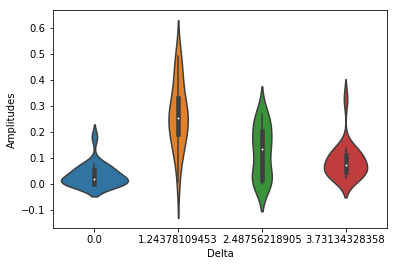

In [63]:
sn.violinplot(x="Delta", y="Amplitudes", data=df_delta);
plt.show()

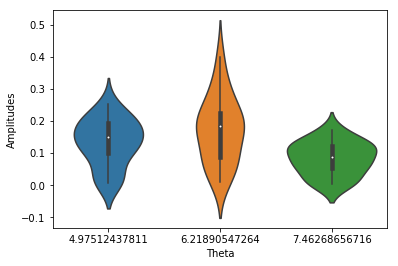

In [64]:
sn.violinplot(x="Theta", y="Amplitudes", data=df_theta);
plt.show()

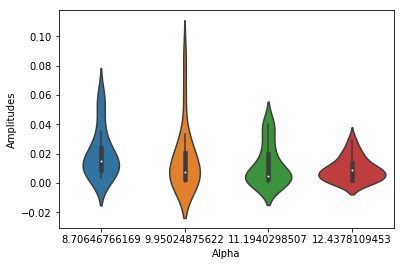

In [65]:
sn.violinplot(x="Alpha", y="Amplitudes", data=df_alpha);
plt.show()

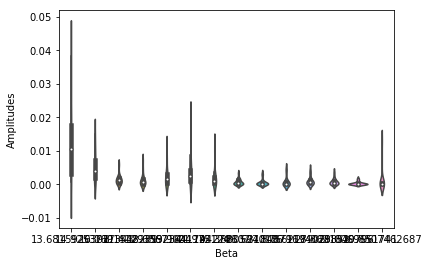

In [66]:
sn.violinplot(x="Beta", y="Amplitudes", data=df_beta);
plt.show()

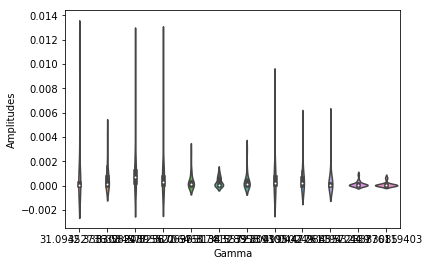

In [67]:
sn.violinplot(x="Gamma", y="Amplitudes", data=df_gamma);
plt.show()

Antes de realizar el test, recordemos la hipótesis que utilizamos el en punto d y que volveremos a utilizar en este caso: no puedo distinguir a un paciente sano de un enfermo mediante la banda i.

In [68]:
# Usamos estas variables como globales y se usan dentro del método a llamar.
pacientes_sanos = calcular_pacientes_sanos_normalizando()
pacientes_enfermos = calcular_pacientes_enfermos_normalizando()

/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning:

nperseg = 256 is greater than input length  = 201, using nperseg = 201



In [69]:
amplitudes_sanos_delta = calcular_amplitudes_pacientes_sanos_para_banda_i(0)[1]
amplitudes_enfermos_delta = calcular_amplitudes_pacientes_enfermos_para_banda_i(0)[1]

pvalue_delta = sp.stats.ttest_ind(amplitudes_sanos_delta, amplitudes_enfermos_delta).pvalue
print("El pvalor para delta es: " + str(pvalue_delta))

El pvalor para delta es: 0.134659688513


In [70]:
amplitudes_sanos_theta = calcular_amplitudes_pacientes_sanos_para_banda_i(1)[1]
amplitudes_enfermos_theta = calcular_amplitudes_pacientes_enfermos_para_banda_i(1)[1]

pvalue_theta = sp.stats.ttest_ind(amplitudes_sanos_theta, amplitudes_enfermos_theta).pvalue
print("El pvalor para theta es: " + str(pvalue_theta))

El pvalor para theta es: 0.343067731087


In [71]:
amplitudes_sanos_alpha = calcular_amplitudes_pacientes_sanos_para_banda_i(2)[1]
amplitudes_enfermos_alpha = calcular_amplitudes_pacientes_enfermos_para_banda_i(2)[1]

pvalue_alpha = sp.stats.ttest_ind(amplitudes_sanos_alpha, amplitudes_enfermos_alpha).pvalue
print("El pvalor para alpha es: " + str(pvalue_alpha))

El pvalor para alpha es: 2.12050748055e-05


In [72]:
amplitudes_sanos_beta = calcular_amplitudes_pacientes_sanos_para_banda_i(3)[1]
amplitudes_enfermos_beta = calcular_amplitudes_pacientes_enfermos_para_banda_i(3)[1]

pvalue_beta = sp.stats.ttest_ind(amplitudes_sanos_beta, amplitudes_enfermos_beta).pvalue
print("El pvalor para beta es: " + str(pvalue_beta))

El pvalor para beta es: 0.000354310299975


In [73]:
amplitudes_sanos_gamma = calcular_amplitudes_pacientes_sanos_para_banda_i(4)[1]
amplitudes_enfermos_gamma = calcular_amplitudes_pacientes_enfermos_para_banda_i(4)[1]

pvalue_gamma = sp.stats.ttest_ind(amplitudes_sanos_gamma, amplitudes_enfermos_gamma).pvalue
print("El pvalor para gamma es: " + str(pvalue_gamma))

El pvalor para gamma es: 5.83250171506e-06


Con los valores normalizados podemos ver que la hipótesis se rechaza para las mismas bandas (alpha, beta y gamma).

## Análisis de información

### Ejercicio a
Computar una medida de información intra-electrodo. Calcular la media entre canales y epochs para cada sujeto. Realizar el gráfico elegido en el punto c) de la sección anterior, acompañado del test estadístico apropiado.

En el caso de EEG, puede ser para evaluar la cantidad de información en cada electrodo, la información mutua o conectividad entre pares de electrodos, etc.

In [26]:
def calcular_probabilidades(lista):
    probabilidades=[]
    for item in lista:
        probabilidad=item/sum(lista)
        for _ in range(item):
            probabilidades.append(probabilidad)
    return probabilidades

In [74]:
def calculate_mean(filename):
    m = sp.io.loadmat(filename)
    paciente_sano_10 = m['data']

    # epoch X serie temporal
    elect8_sano = paciente_sano_10[:,7,:]
    elect44_sano = paciente_sano_10[:,43,:]
    elect80_sano = paciente_sano_10[:,79,:]
    elect131_sano = paciente_sano_10[:,130,:]
    elect185_sano = paciente_sano_10[:,184,:]

    df8 = pd.DataFrame(elect8_sano)
    df44 = pd.DataFrame(elect44_sano)
    df80 = pd.DataFrame(elect80_sano)
    df131 = pd.DataFrame(elect131_sano)
    df185 = pd.DataFrame(elect185_sano)    

    df8_Media = df8.mean(axis=0)
    df44_Media = df8.mean(axis=0)
    df80_Media = df8.mean(axis=0)
    df131_Media = df8.mean(axis=0)
    df185_Media = df8.mean(axis=0)
    
    mean = (df8_Media + df44_Media + df80_Media + df131_Media + df185_Media)/5

    return mean

def calcular_media_pacientes_sanos():
    df_pacientes_sanos = pd.DataFrame()
    df_pacientes_sanos['Amplitudes_1'] = calculate_mean('S01.mat')
    df_pacientes_sanos['Amplitudes_2'] = calculate_mean('S02.mat')
    df_pacientes_sanos['Amplitudes_3'] = calculate_mean('S03.mat')
    df_pacientes_sanos['Amplitudes_4'] = calculate_mean('S04.mat')
    df_pacientes_sanos['Amplitudes_5'] = calculate_mean('S05.mat')
    df_pacientes_sanos['Amplitudes_6'] = calculate_mean('S06.mat')
    df_pacientes_sanos['Amplitudes_7'] = calculate_mean('S07.mat')
    df_pacientes_sanos['Amplitudes_8'] = calculate_mean('S08.mat')
    df_pacientes_sanos['Amplitudes_9'] = calculate_mean('S09.mat')
    df_pacientes_sanos['Amplitudes_10'] = calculate_mean('S10.mat')
    
    return df_pacientes_sanos

def calcular_media_pacientes_enfermos():
    df_pacientes_enfermos = pd.DataFrame()
    df_pacientes_enfermos['Amplitudes_1'] = calculate_mean('P01.mat')
    df_pacientes_enfermos['Amplitudes_2'] = calculate_mean('P02.mat')
    df_pacientes_enfermos['Amplitudes_3'] = calculate_mean('P03.mat')
    df_pacientes_enfermos['Amplitudes_4'] = calculate_mean('P04.mat')
    df_pacientes_enfermos['Amplitudes_5'] = calculate_mean('P05.mat')
    df_pacientes_enfermos['Amplitudes_6'] = calculate_mean('P06.mat')
    df_pacientes_enfermos['Amplitudes_7'] = calculate_mean('P07.mat')
    df_pacientes_enfermos['Amplitudes_8'] = calculate_mean('P08.mat')
    df_pacientes_enfermos['Amplitudes_9'] = calculate_mean('P09.mat')
    df_pacientes_enfermos['Amplitudes_10'] = calculate_mean('P10.mat')
    
    return df_pacientes_enfermos

def calcular_promedio_para_todos_los_pacientes_para_banda(i):
    pacientes_sanos = calcular_pacientes_sanos()
    pacientes_enfermos = calcular_pacientes_enfermos()
    
    pacientes_sanos_para_banda = [paciente[i] for paciente in pacientes_sanos]
    paciente_sano_promedio_banda = sum([paciente[1] for paciente in pacientes_sanos_para_banda])/ len(pacientes_sanos_para_banda)
    
    pacientes_enfermos_para_banda = [paciente[i] for paciente in pacientes_enfermos]
    paciente_enfermo_promedio_banda = sum([paciente[1] for paciente in pacientes_enfermos_para_banda])/ len(pacientes_enfermos_para_banda)
    
    return paciente_sano_promedio_banda, paciente_enfermo_promedio_banda 

## Medida de información intra-electrodo

In [31]:
histogram, bin_edges = np.histogram(a=df8_Media, bins='fd')
probabilidades=calcular_probabilidades(histogram)
entropia = sp.stats.entropy(probabilidades)
print(entropia)

5.20670475513


En este caso lo que nos dice la entropia, es que para representar esta serie de caracteres (nuestra onda categorica) necesitariamos 5 bits de información. Notar que esto es sobre una persona sana. Veamos que pasa con otro electrodo de una persona sana que no sea tan representativo.

In [33]:
histogram, bin_edges = np.histogram(a=df100_Media, bins='fd')
probabilidades=calcular_probabilidades(histogram)
entropia = sp.stats.entropy(probabilidades)
print(entropia)

5.18977742539


Esto nos lleva a una sorpresa ya que no nos imaginabamos que ibamos a necesitar la misma cantidad de bits para representar dicha serie ya que deberia tener menos picos, y ser mas "suave", es decir con menos picos, ergo deberiamos necesitar menos bits para rerpesentarla.

In [43]:
trace1 = Scatter(y=df100_Media, name='Media electrodo 100 persona sana')

data = [trace1]

layout = dict(title = 'Media de muestras tomadas por el electrodo 100 persona sana',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

Como podemos ver, a lo contrario de lo que pensabamos, dicha onda presenta muchas oscilaciones por lo que vamos a requerir de muchos bits.

Ahora veamos lo mismo para las personas enfermas:

In [38]:
histogram, bin_edges = np.histogram(a=df8_Media_enfermo, bins='fd')
probabilidades=calcular_probabilidades(histogram)
entropia = sp.stats.entropy(probabilidades)
print(entropia)

5.05558381682


In [39]:
histogram, bin_edges = np.histogram(a=df100_Media_enfermo, bins='fd')
probabilidades=calcular_probabilidades(histogram)
entropia = sp.stats.entropy(probabilidades)
print(entropia)

5.17514072655


De acuerdo a nuestras hipotesis, las personas enfermas deberian presentar ondas mucho mas suaves sin tantos picos, raramente esto no sucede al analizarlo. Queda pendiente responder esta pregunta. Mostramos dicho grafico para corroborar lo dicho:

In [44]:
trace1 = Scatter(y=df100_Media_enfermo, name='Media electrodo 100 persona enferma')

data = [trace1]

layout = dict(title = 'Media de muestras tomadas por el electrodo 100 persona enferma',
              yaxis = dict(autorange=True),
              xaxis = dict(autorange=True)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig, filename='media-eeg-8')

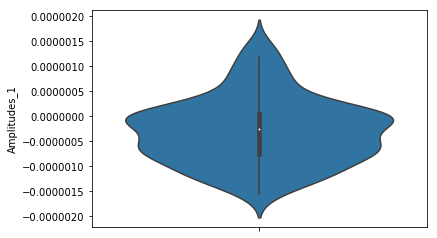

In [76]:
media_pacientes_sanos = calcular_media_pacientes_sanos()

sn.violinplot(y="Amplitudes_1", data=media_pacientes_sanos);
plt.show()

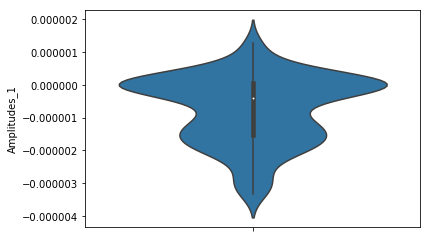

In [77]:
media_pacientes_enfermos = calcular_media_pacientes_enfermos()

sn.violinplot(y="Amplitudes_1", data=media_pacientes_enfermos);
plt.show()

Ahora promediemos absolutamente todo y comparemos enfermos vs sanos

In [78]:
media_de_medias_pacientes_sanos = media_pacientes_sanos.mean(axis=1)
media_de_medias_pacientes_enfermos = media_pacientes_enfermos.mean(axis=1)

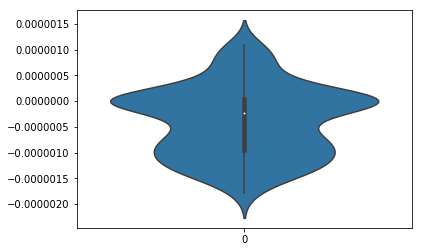

In [79]:
sn.violinplot(data=media_de_medias_pacientes_sanos);
plt.show()

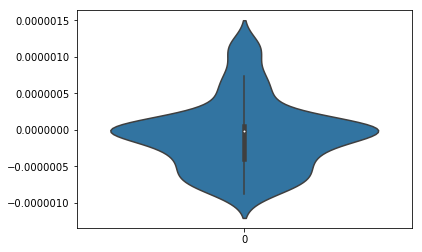

In [80]:
sn.violinplot(data=media_de_medias_pacientes_enfermos);
plt.show()

In [81]:
pvalue = sp.stats.ttest_ind(media_de_medias_pacientes_sanos, media_de_medias_pacientes_enfermos).pvalue
print("El pvalor es: " + str(pvalue))

El pvalor es: 2.02653402773e-07


Dado este resultado, podemos decir que si podeos distinguir a un paciente sano de un enfermo mediante la media entre canales y epochs (es decir, rechazamos H0)

### Ejercicio b
Repetir el punto a) para una medida inter-electrodo.

In [87]:
log2 = lambda x: log(x, 2)
def conditional_entropy(x, y):
    histogram_x, bin_edges_x = np.histogram(a=x, bins='fd')
    histogram_y, bin_edges_y = np.histogram(a=y, bins='fd')    
    Py= calcular_probabilidades(histogram_x)
    Px= calcular_probabilidades(histogram_y)   
    res=0
    for index_y, value_y in enumerate(y):
        # P(X | Y)
        x1=x[y==value_y]
        condPxy = calcular_probabilidades(sp.digitize(x1, range(len(histogram_x))))
        for k, v in enumerate(condPxy):
            res+= (v*Py[index_y]*(log2(Px[k]) - log2(v*Py[index_y])))
    return res

In [90]:
print("Entropia condicional entre {} y {} es {} de una persona sana".format("Electrodo 8", "electrodo 44", conditional_entropy(x=df8_Media, y=df44_Media)))

Entropia condicional entre Electrodo 8 y electrodo 44 es -7.749085524737407


/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in long_scalars



Sabemos que nos estamos equivocando en algo ya que la entropia conjunta no puede ser negativa, pero analicemos si fuese positivo dicho valor arrojado.

In [91]:
print("Entropia condicional entre {} y {} es {} de una persona sana".format("Electrodo 8", "electrodo 100", conditional_entropy(x=df8_Media, y=df100_Media)))

Entropia condicional entre Electrodo 8 y electrodo 44 es -20.590597840013654 de una persona sana


/Users/mrey/anaconda/envs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in long_scalars



Podemos concluir que entre dos electrodos que se parecen mucho, necesitamos menos cantidad de bits para representar dicha serie de simbolos. Ahora bien, cuando vemos la entropia conjunta entre el electrodo 8 y 100, los cuales presentan ondas muy distintas, necesitamos muchos mas bits para rerpesentarlos (de 8 bits pasamos a 21 bits)